In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
products = pd.read_csv("Products_with_Categories.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
df = transactions.merge(products, on="productId", how="left")

In [5]:
df.head()

,Member_number,Date,productId,items,productName,price,Category
0,1808,21-07-2015,1,3,tropical fruit,7.8,Fresh Food
1,2552,05-01-2015,2,1,whole milk,1.8,Dairy
2,2300,19-09-2015,3,3,pip fruit,3.0,Fresh Food
3,1187,12-12-2015,4,3,other vegetables,0.8,Fresh Food
4,3037,01-02-2015,2,1,whole milk,1.8,Dairy


In [6]:
print(df.isnull().sum())

Member_number    0
Date             0
productId        0
items            0
productName      0
price            0
Category         0
dtype: int64


In [7]:
print(df.describe())

       Member_number     productId         items         price
count   38765.000000  38765.000000  38765.000000  38765.000000
mean     3003.641868     39.956094      1.996131      4.295170
std      1153.611031     37.294166      0.817645      4.313656
min      1000.000000      1.000000      1.000000      0.300000
25%      2002.000000      9.000000      1.000000      1.250000
50%      3005.000000     25.000000      2.000000      2.500000
75%      4007.000000     64.000000      3.000000      6.100000
max      5000.000000    167.000000      3.000000     28.500000


In [8]:
# Chuyển cột Date về dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df_daily = df.groupby("Date")["Member_number"].count()

In [9]:
print('Transactions timeframe from {} to {}'.format(df['Date'].min(), df['Date'].max()))

print('{:,} unique Member_number'.format(len(df.Member_number.unique())))

Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00
3,898 unique Member_number


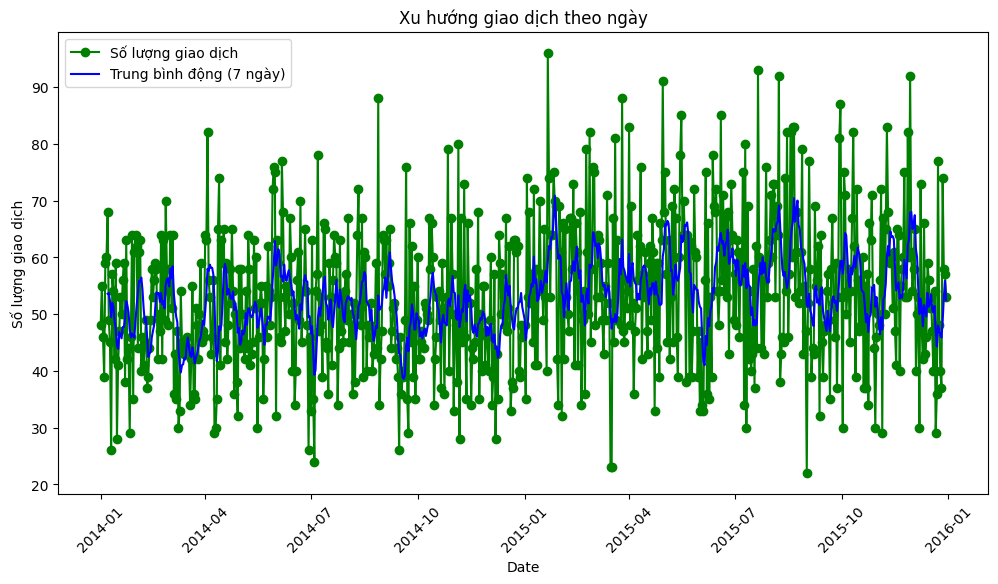

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  
df_daily = df.groupby('Date').size()  # Đếm số lượng giao dịch theo ngày

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df_daily, marker="o", linestyle="-", color="g", label="Số lượng giao dịch") 
plt.plot(df_daily.rolling(window=7).mean(), linestyle="-", color="b", label="Trung bình động (7 ngày)") 
plt.xlabel("Date")
plt.ylabel("Số lượng giao dịch")
plt.title("Xu hướng giao dịch theo ngày")
plt.xticks(rotation=45)
plt.legend()  
plt.show()

# Nhận xét:
    - Mặc dù có nhiều biến động, vẫn có xu hướng tăng nhẹ trong khối lượng giao dịch theo thời gian.
    - Đỉnh điểm ở giữa năm 2015 về khối lượng giao dịch, đầu tháng 02/2015 cao nhất.

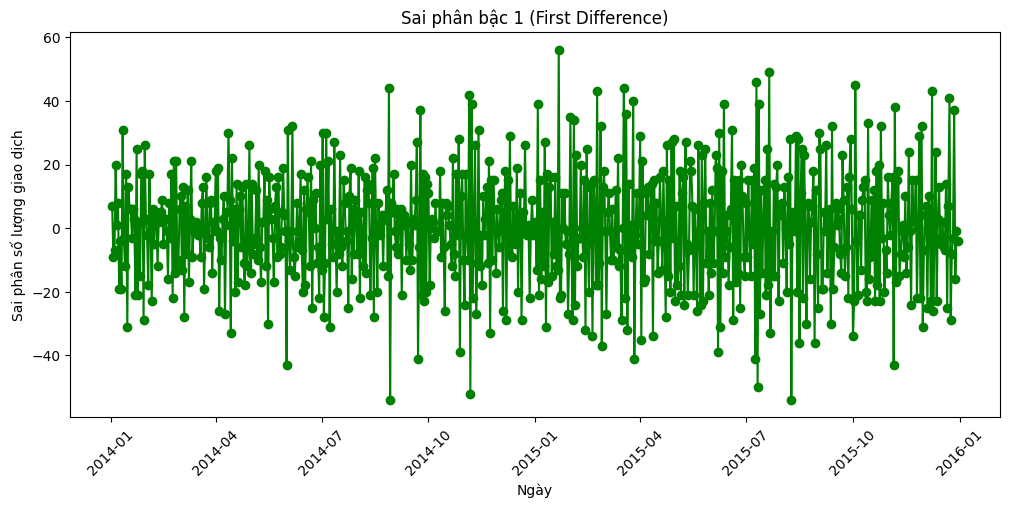

In [11]:
df_diff = df_daily.diff().dropna()

plt.figure(figsize=(12, 5))
plt.plot(df_diff, marker="o", linestyle="-", color="g")
plt.title("Sai phân bậc 1 (First Difference)")
plt.xlabel("Ngày")
plt.ylabel("Sai phân số lượng giao dịch")
plt.xticks(rotation=45)
plt.show()

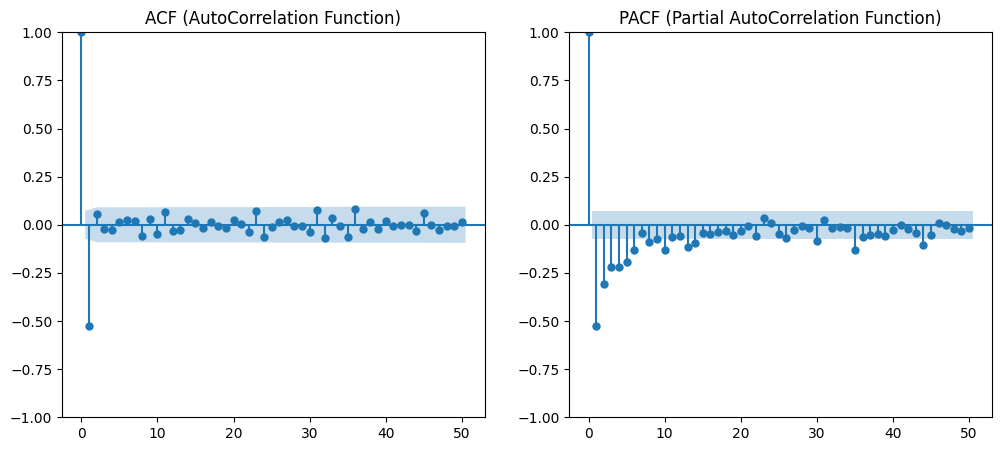

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df_diff, lags=50, ax=ax[0]) 
plot_pacf(df_diff, lags=50, ax=ax[1])
ax[0].set_title("ACF (AutoCorrelation Function)")
ax[1].set_title("PACF (Partial AutoCorrelation Function)")
plt.show()

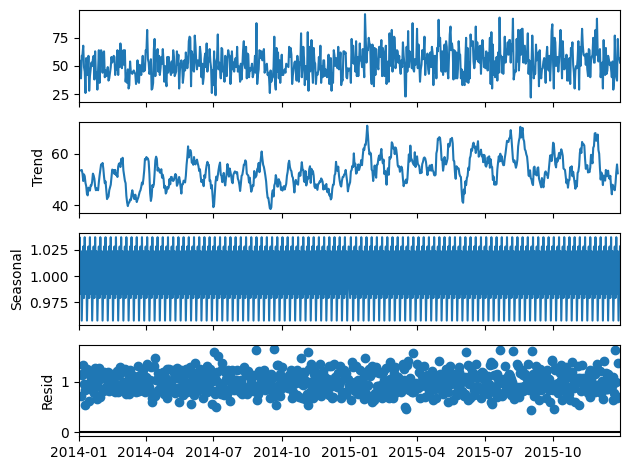

In [13]:
decomposition = seasonal_decompose(df_daily, model='multiplicative', period=7)
decomposition.plot()
plt.show()


In [14]:
# ==> Có tính mùa vụ theo tuần

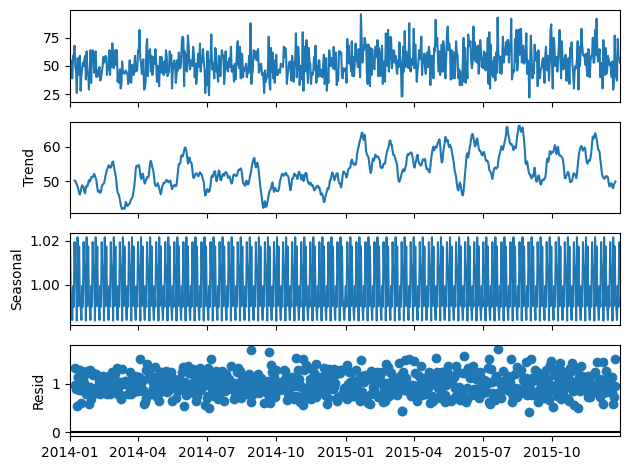

In [15]:
decomposition = seasonal_decompose(df_daily, model='multiplicative', period=12)
decomposition.plot()
plt.show()

In [16]:
# ==> Có tính mùa vụ theo tháng

# Nhận xét:
    - Khi kiểm tra tính mùa vụ, dữ liệu có tính lập lại theo chu kỳ của tuần và tháng

C:\Users\Thu\AppData\Local\Temp\ipykernel_37252\1247307518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


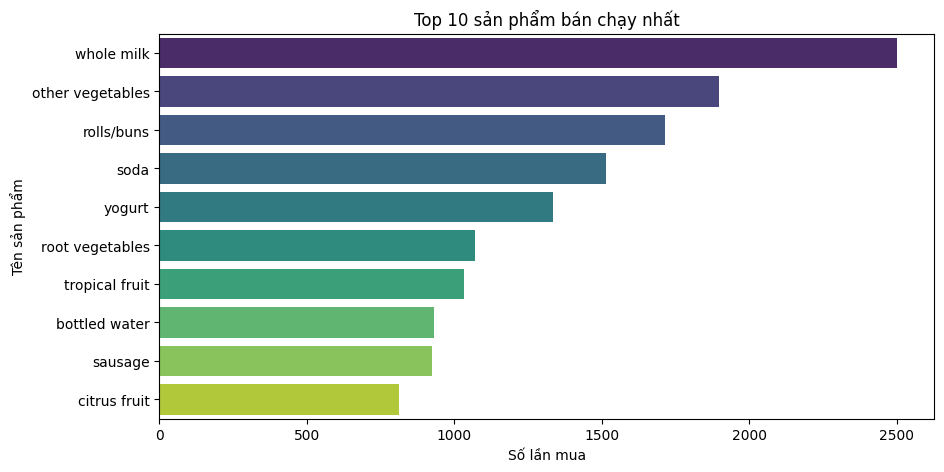

In [17]:
top_products = df["productName"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Số lần mua")
plt.ylabel("Tên sản phẩm")
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.show()

C:\Users\Thu\AppData\Local\Temp\ipykernel_37252\3503488064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tail_products.values, y=tail_products.index, palette="viridis")


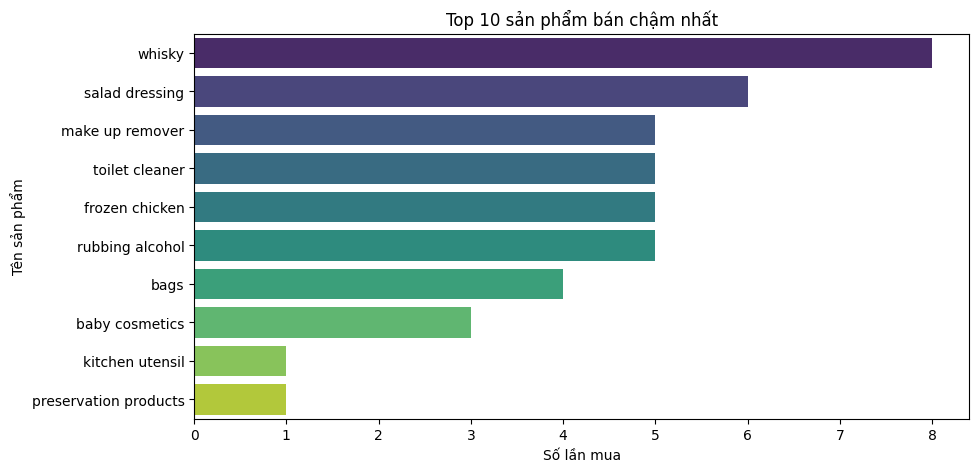

In [18]:
tail_products = df["productName"].value_counts().tail(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=tail_products.values, y=tail_products.index, palette="viridis")
plt.xlabel("Số lần mua")
plt.ylabel("Tên sản phẩm")
plt.title("Top 10 sản phẩm bán chậm nhất")
plt.show()

# Nhận xét:
    - Sản phẩm Whole milk là sản phẩm bán chạy nhất: 2500 lần.
    => Sử dụng được hàng ngày nên số lượng người mua rất lớn.
    - Sản phẩm Kitchen utensil và Preservation products là 2 sản phẩm bán rất chậm chỉ với 1 lượt bán.
    => Sản phẩm tái sử dụng được nên khách hàng ít khi mua.

In [19]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['sales']=df['items']*df['price']
# Tính tổng doanh thu theo tháng
monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()

max_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmax()]
min_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmin()]

print("Tháng bán nhiều nhất mỗi năm:")
print(max_month_per_year)

print("\nTháng bán ít nhất mỗi năm:")
print(min_month_per_year)

Tháng bán nhiều nhất mỗi năm:
    year  month     sales
7   2014      8  13616.61
19  2015      8  17047.68

Tháng bán ít nhất mỗi năm:
    year  month     sales
10  2014     11  11793.46
23  2015     12  12744.26


In [20]:
product_sales = df.groupby(['year', 'month', 'productName'])['items'].sum().reset_index()

max_product_per_month = product_sales.loc[product_sales.groupby(['year', 'month'])['items'].idxmax()]
min_product_per_month = product_sales.loc[product_sales.groupby(['year', 'month'])['items'].idxmin()]

print("Sản phẩm bán nhiều nhất trong mỗi tháng của từng năm:")
print(max_product_per_month)

print("\nSản phẩm bán ít nhất trong mỗi tháng của từng năm:")
print(min_product_per_month)

Sản phẩm bán nhiều nhất trong mỗi tháng của từng năm:
      year  month       productName  items
103   2014      1        rolls/buns    177
218   2014      2  other vegetables    155
405   2014      3        whole milk    176
554   2014      4        whole milk    200
640   2014      5  other vegetables    173
833   2014      6        whole milk    184
975   2014      7        whole milk    201
1066  2014      8  other vegetables    186
1257  2014      9        whole milk    189
1365  2014     10        rolls/buns    195
1536  2014     11        whole milk    178
1674  2014     12        whole milk    177
1810  2015      1        whole milk    242
1942  2015      2        whole milk    225
2080  2015      3        whole milk    254
2216  2015      4        whole milk    254
2351  2015      5        whole milk    260
2486  2015      6        whole milk    227
2625  2015      7        whole milk    223
2766  2015      8        whole milk    288
2896  2015      9        whole milk    237


# Nhận xét:
    - Sản phẩm bán nhiều nhất trong tháng 8 của từng năm 2014: whole milk với 200 lượt mua.
    - Sản phẩm bán nhiều nhất trong tháng 8 của từng năm 2015:whole milk với 288 lượt mua.
                        ---------------------------------------
    - Sản phẩm bán ít nhất trong tháng 11 của từng năm 2014:cleaner với 1 lượt mua.                      - Sản phẩm bán ít nhất trong tháng 12 của từng năm 2015:cereals với 1 lượt mua.             

In [21]:
product_sales = df.groupby(['year', 'month', 'productName'])['sales'].sum().reset_index()

max_revenue_product = product_sales.loc[product_sales.groupby(['year', 'month'])['sales'].idxmax()]
min_revenue_product = product_sales.loc[product_sales.groupby(['year', 'month'])['sales'].idxmin()]

print("Sản phẩm có doanh thu cao nhất trong mỗi tháng của từng năm:")
print(max_revenue_product)

print("\nSản phẩm có doanh thu thấp nhất trong mỗi tháng của từng năm:")
print(min_revenue_product)

Sản phẩm có doanh thu cao nhất trong mỗi tháng của từng năm:
      year  month     productName   sales
79    2014      1         napkins   654.0
211   2014      2         napkins   697.6
346   2014      3         napkins   959.2
491   2014      4         napkins   719.4
560   2014      5            beef   838.5
702   2014      6            beef   682.5
916   2014      7         napkins   893.8
984   2014      8            beef   877.5
1199  2014      9         napkins   675.8
1340  2014     10         napkins   697.6
1479  2014     11         napkins   872.0
1616  2014     12         napkins   632.2
1680  2015      1            beef  1267.5
1820  2015      2            beef  1228.5
1951  2015      3            beef  1228.5
2087  2015      4            beef  1111.5
2224  2015      5            beef   955.5
2358  2015      6            beef  1053.0
2495  2015      7            beef   936.0
2631  2015      8            beef  1345.5
2775  2015      9            beef   819.0
2904  2015     

# Nhận xét:
    - Sản phẩm có doanh thu nhiều nhất trong tháng 8 của từng năm 2014: beef với 877.5$.
    - Sản phẩm có doanh thu nhiều nhất trong tháng 8 của từng năm 2015: beef với 1345.5$.
    - Sản phẩm có doanh thu cao nhất trong năm 2014 vào tháng 3: napkins với 959.2$.
    - Sản phẩm có doanh thu cao nhất trong năm 2015 vào tháng 10: beef với 1501.5$.
                        ---------------------------------------
    - Sản phẩm có doanh thu ít nhất trong tháng 5 và 12 của năm 2014:snack products với 0.9$.  
    - Sản phẩm có doanh thu ít nhất trong tháng 9 và 11 của năm 2015:Instant food products với 0.6$. 
                        ---------------------------------------
    - Tháng 8 bán nhiều nhất năm 2014 là 13617$ thì sản phẩm beef là 878$ chiếm 6.4%.
    - Tháng 8 bán nhiều nhất năm 2015 là 17048$ thì sản phẩm beef là 1346$ chiếm 7.9%.